In [1]:
import json
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import string
import os
import math
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from collections import Counter


In [2]:
import nltk

# nltk.download()
print nltk.corpus.stopwords.words("english")

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

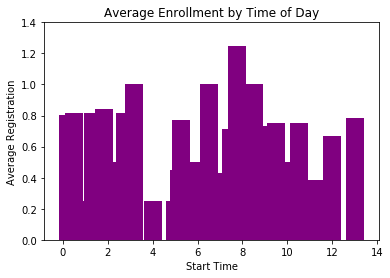

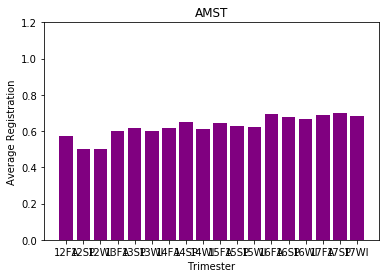

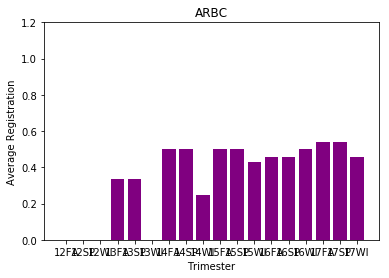

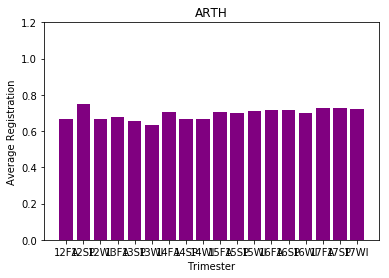

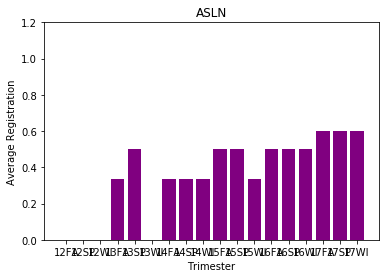

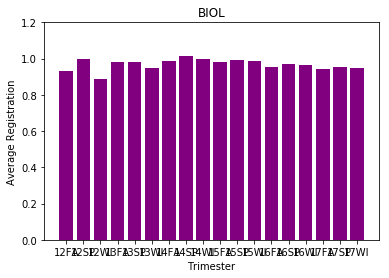

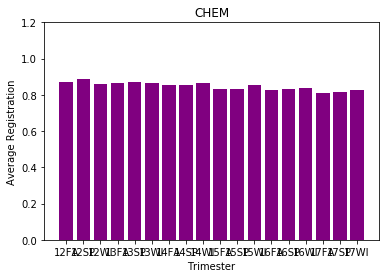

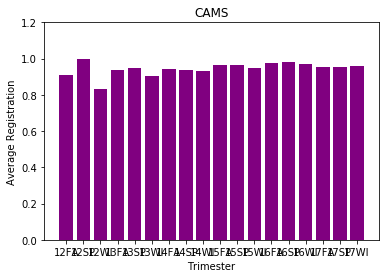

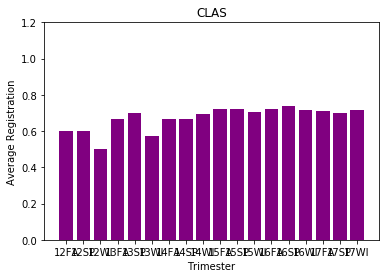

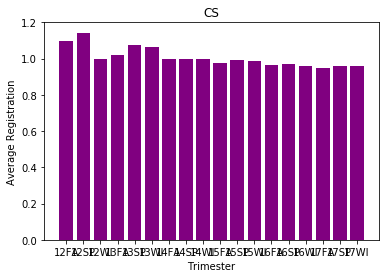

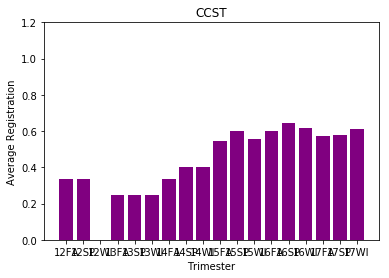

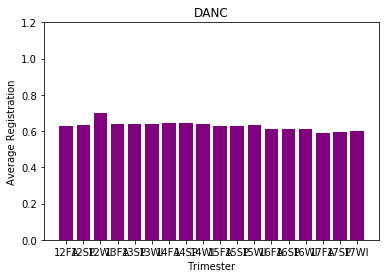

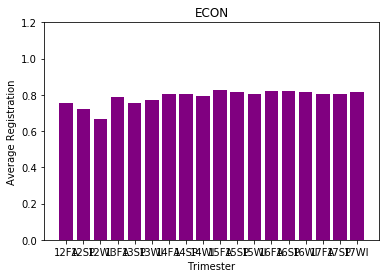

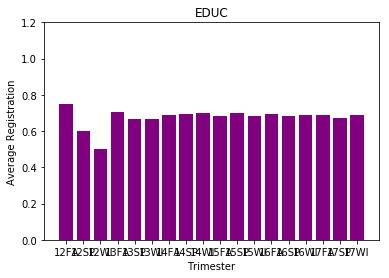

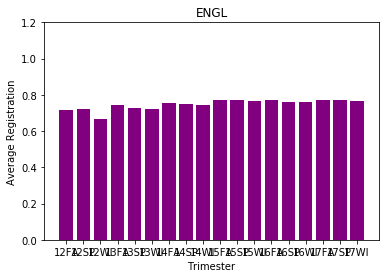

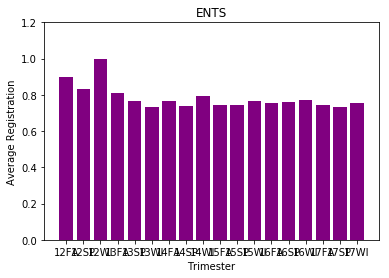

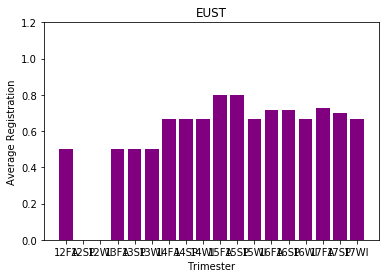

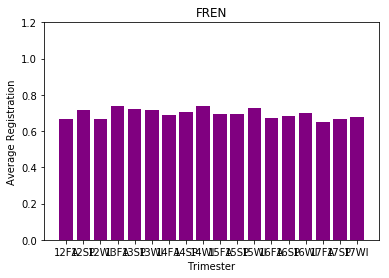

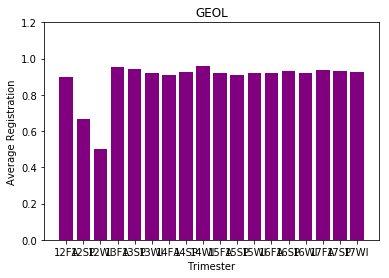

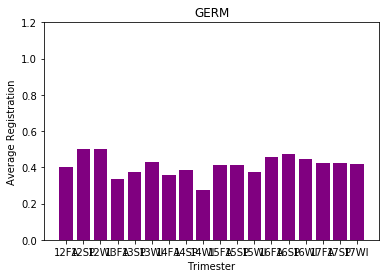

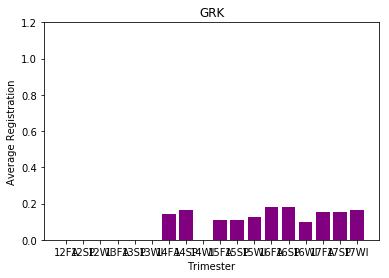

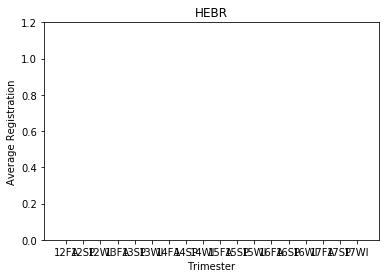

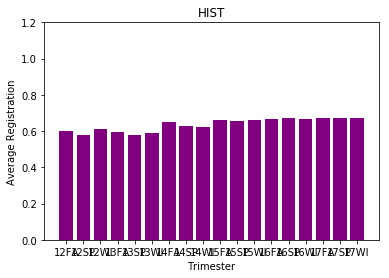

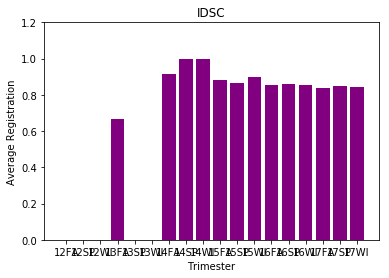

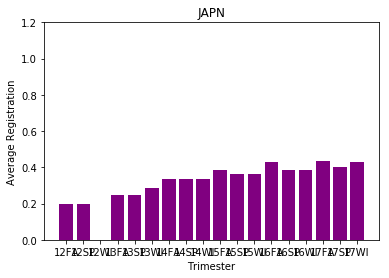

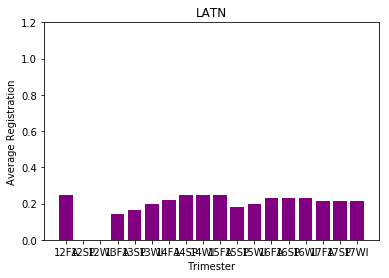

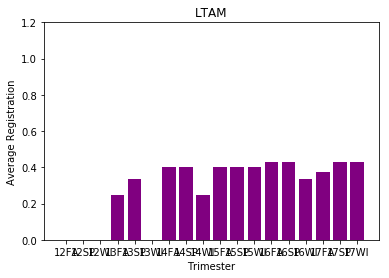

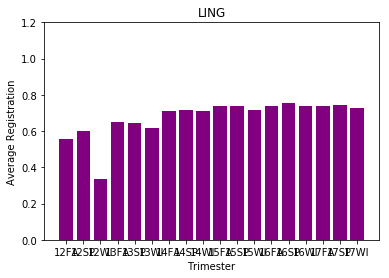

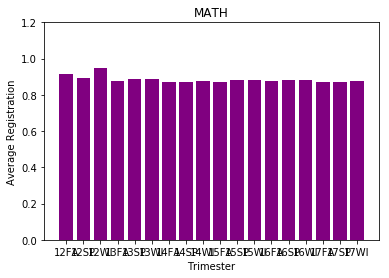

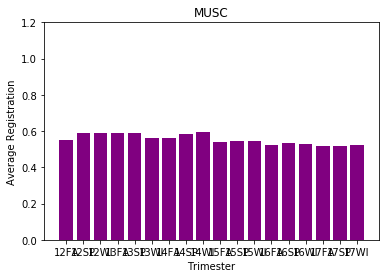

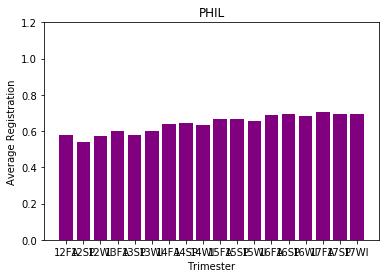

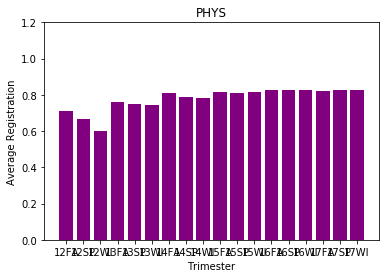

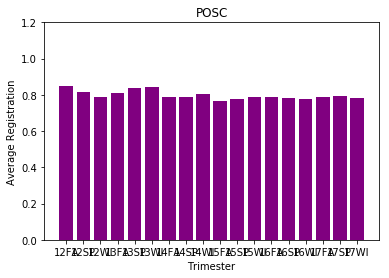

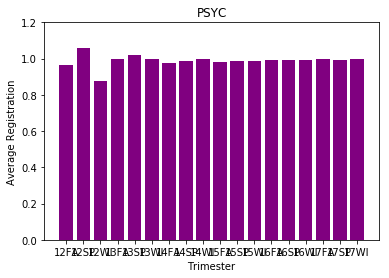

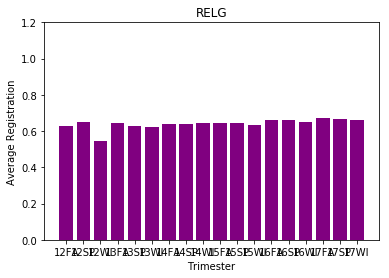

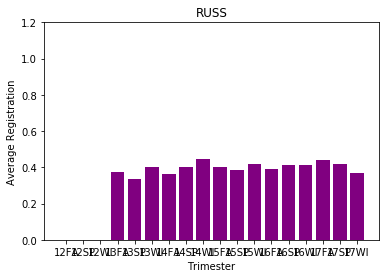

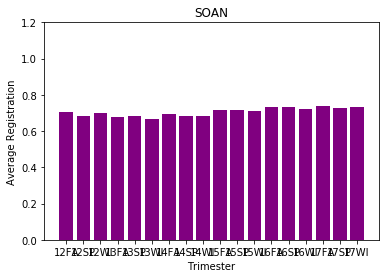

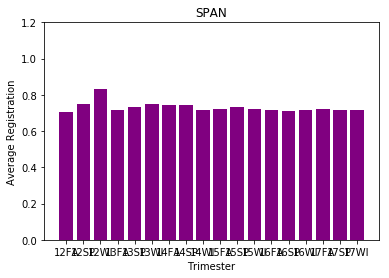

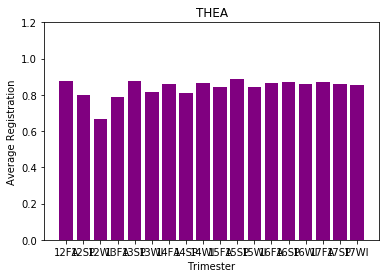

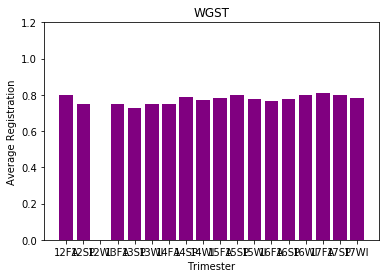

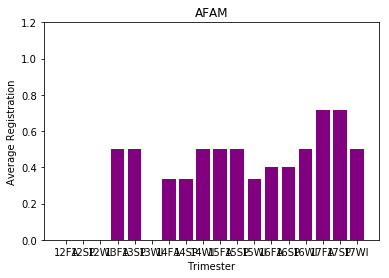

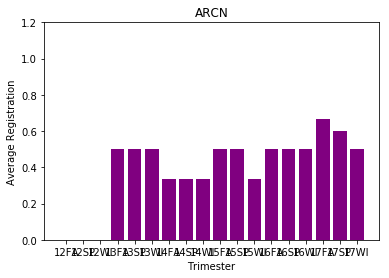

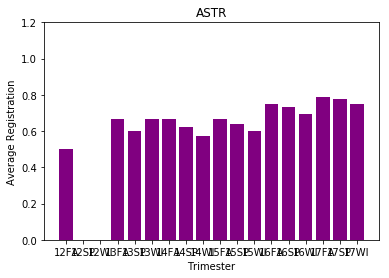

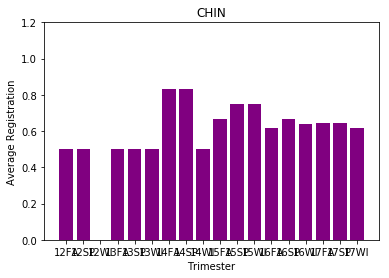

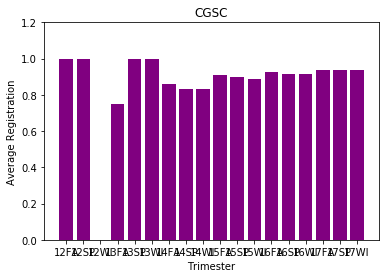

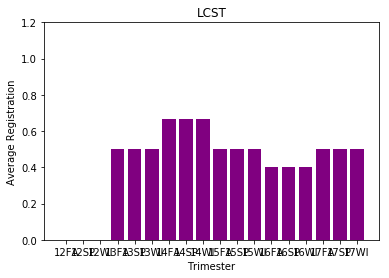

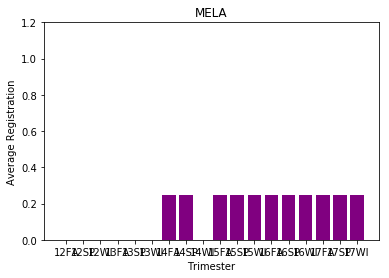

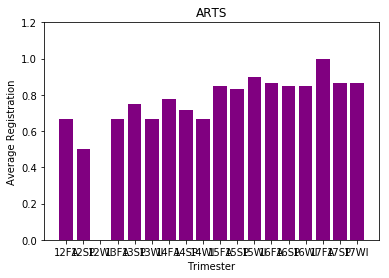

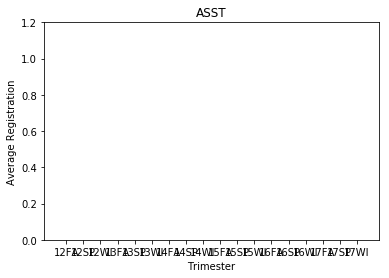

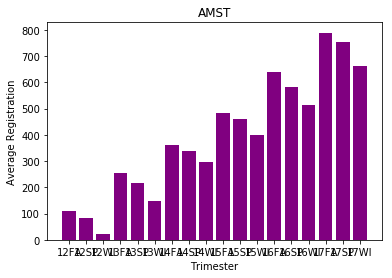

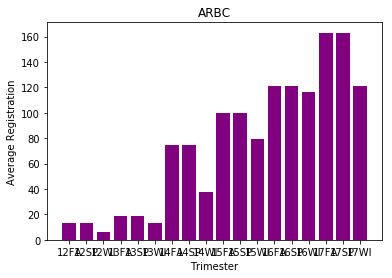

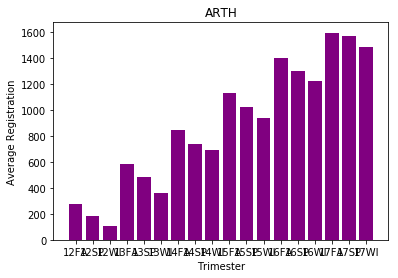

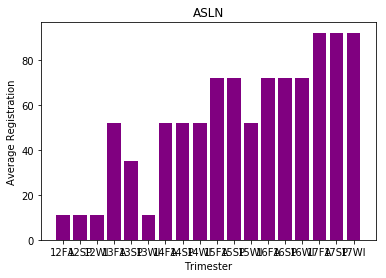

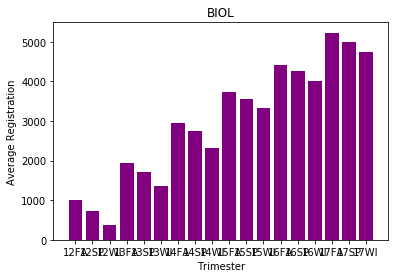

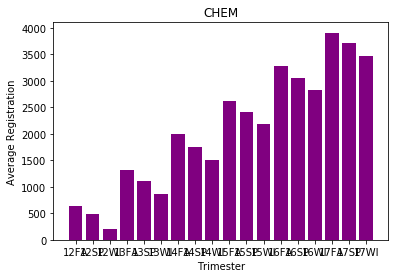

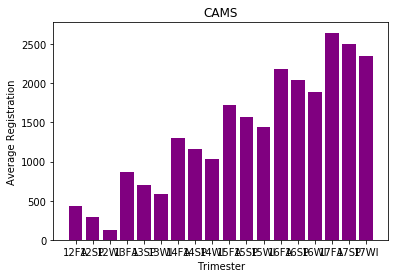

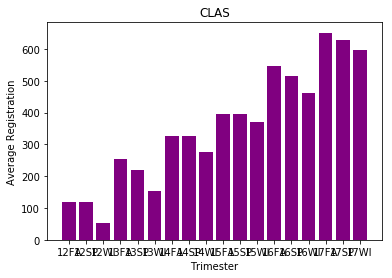

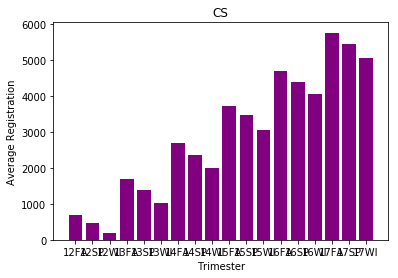

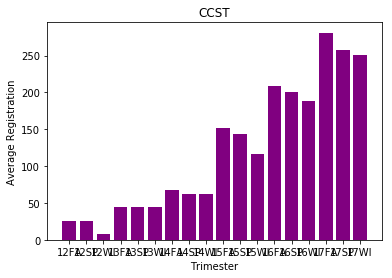

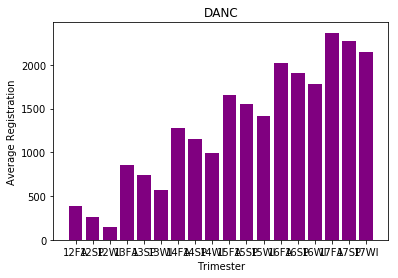

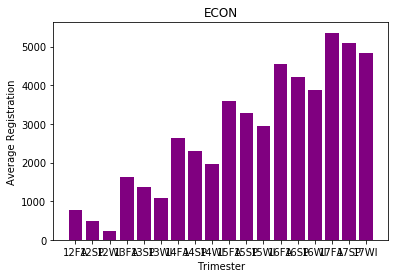

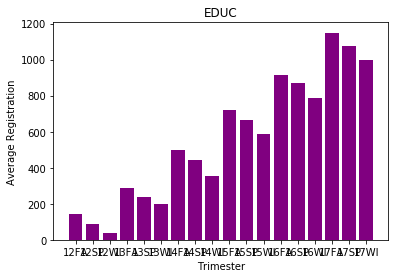

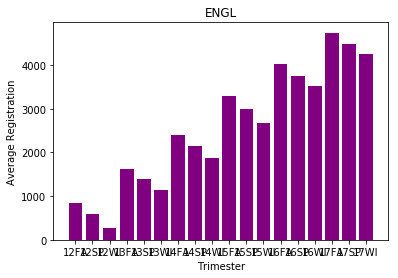

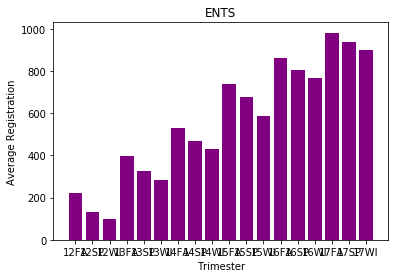

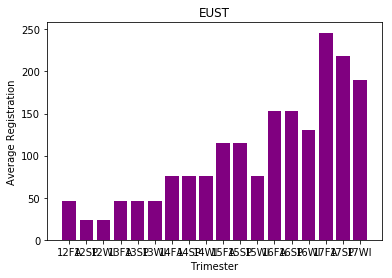

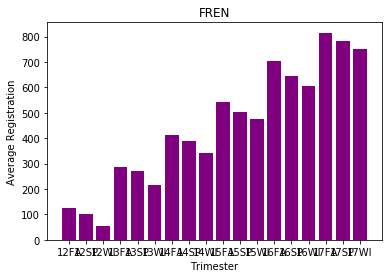

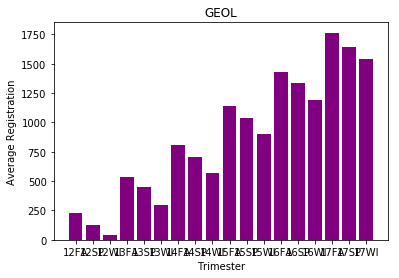

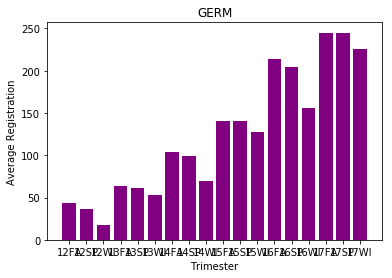

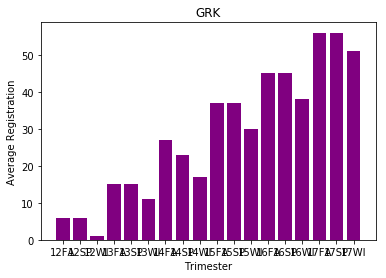

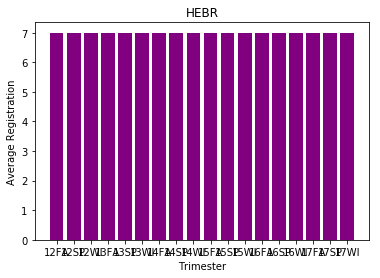

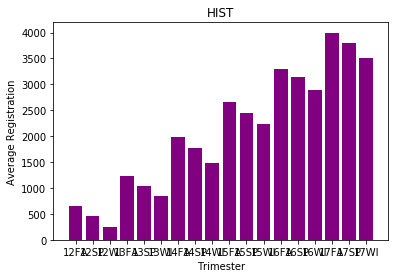

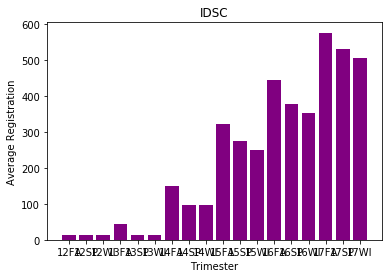

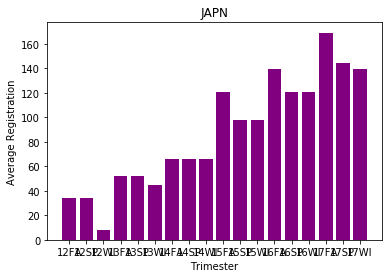

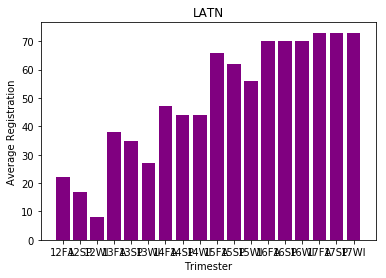

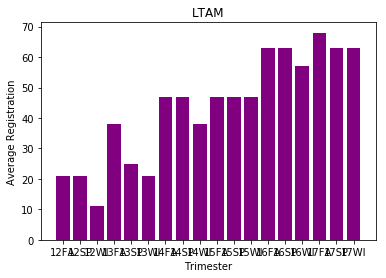

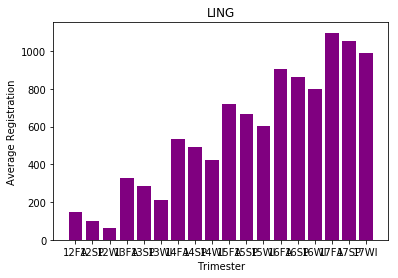

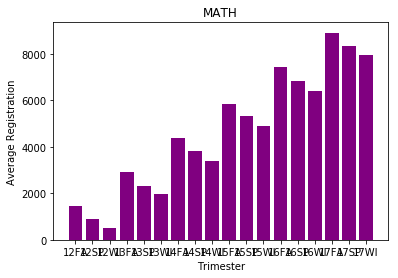

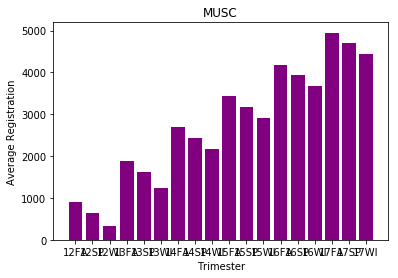

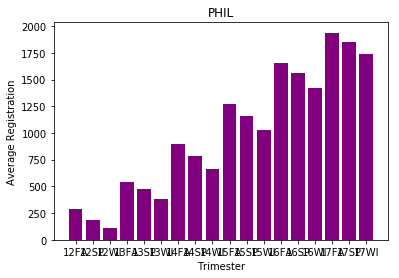

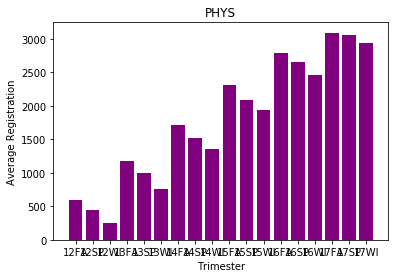

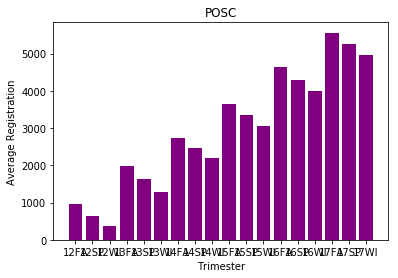

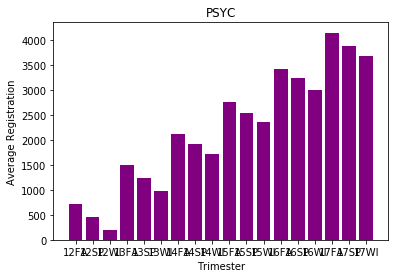

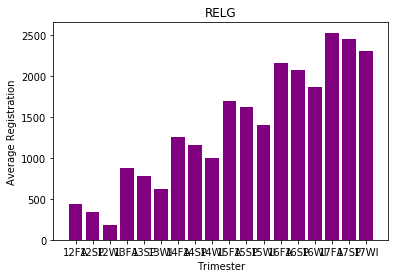

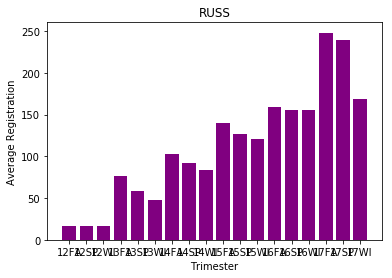

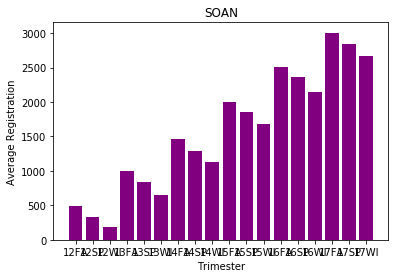

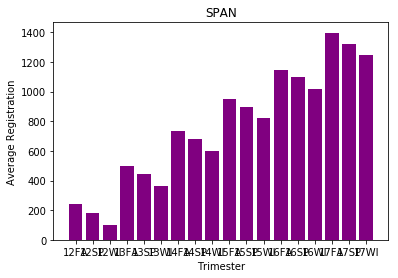

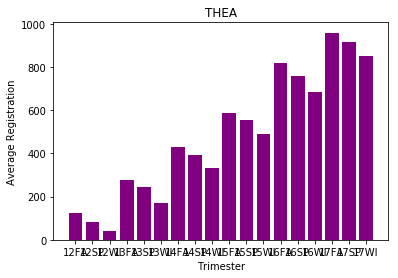

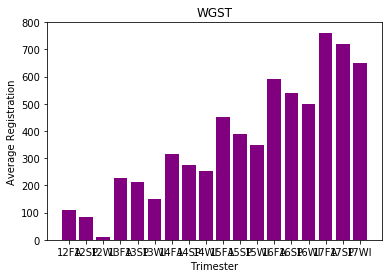

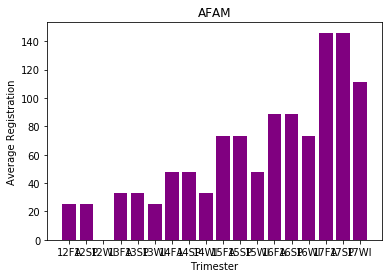

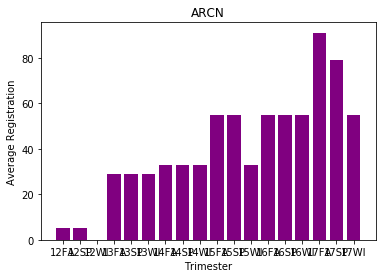

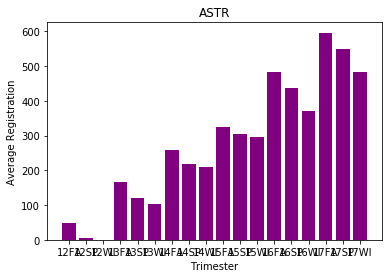

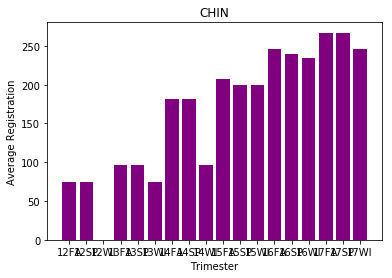

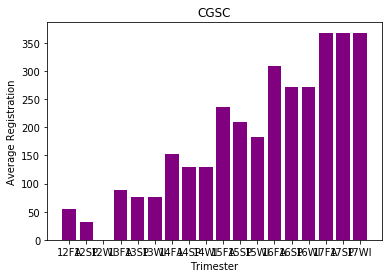

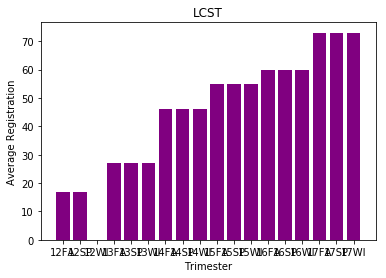

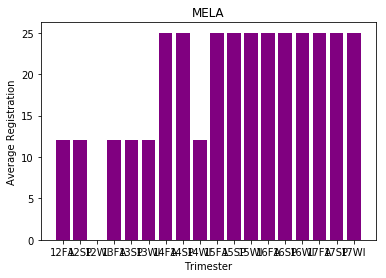

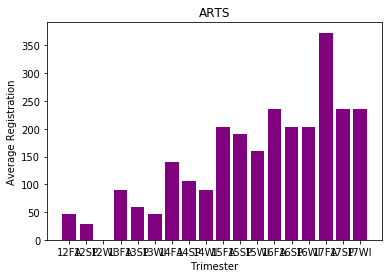

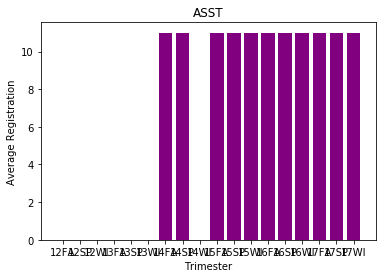

AMST
ttest_ind:            t = -1.15732  p = 0.270772
ttest_ind_from_stats: t = -1.15732  p = 0.270772
formula:              t = -1.15732  p = 0.270772
12 mean = 0.617142857143
16 mean = 0.770833333333
Increase in Average Enrollment
ARBC
ttest_ind:            t = 4e-16  p = 1
ttest_ind_from_stats: t = 4e-16  p = 1
formula:              t = 4e-16  p = 1
12 mean = 0.333333333333
16 mean = 0.333333333333
Decrease in Average Enrollment
ARTH
ttest_ind:            t = -0.671997  p = 0.507604
ttest_ind_from_stats: t = -0.671997  p = 0.507604
formula:              t = -0.671997  p = 0.507604
12 mean = 0.669333333333
16 mean = 0.738974358974
Increase in Average Enrollment
ASLN
ttest_ind:            t = nan  p = nan
ttest_ind_from_stats: t = nan  p = nan
formula:              t = nan  p = nan
12 mean = 0.44
16 mean = nan
Increase in Average Enrollment
BIOL
ttest_ind:            t = 1.66129  p = 0.105007
ttest_ind_from_stats: t = 1.66129  p = 0.105007
formula:              t = 1.66129  p = 0.1050

C:\Users\adria\Anaconda2\lib\site-packages\ipykernel_launcher.py:202: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\adria\Anaconda2\lib\site-packages\ipykernel_launcher.py:206: RuntimeWarning: Mean of empty slice.
C:\Users\adria\Anaconda2\lib\site-packages\ipykernel_launcher.py:207: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\adria\Anaconda2\lib\site-packages\ipykernel_launcher.py:217: RuntimeWarning: invalid value encountered in double_scalars



12 mean = 0.408888888889
16 mean = 0.66
Increase in Average Enrollment
DANC
ttest_ind:            t = 1.77888  p = 0.080949
ttest_ind_from_stats: t = 1.77888  p = 0.080949
formula:              t = 1.77888  p = 0.080949
12 mean = 0.663703703704
16 mean = 0.55724137931
Decrease in Average Enrollment
ECON
ttest_ind:            t = -0.530099  p = 0.597683
ttest_ind_from_stats: t = -0.530099  p = 0.597683
formula:              t = -0.530099  p = 0.597683
12 mean = 0.783333333333
16 mean = 0.809185185185
Increase in Average Enrollment
EDUC
ttest_ind:            t = 0.415667  p = 0.683272
ttest_ind_from_stats: t = 0.415667  p = 0.683272
formula:              t = 0.415667  p = 0.683272
12 mean = 0.751666666667
16 mean = 0.692777777778
Decrease in Average Enrollment
ENGL
ttest_ind:            t = -0.520968  p = 0.603607
ttest_ind_from_stats: t = -0.520968  p = 0.603607
formula:              t = -0.520968  p = 0.603607
12 mean = 0.728993710692
16 mean = 0.752836879433
Increase in Average Enrol

C:\Users\adria\Anaconda2\lib\site-packages\ipykernel_launcher.py:201: RuntimeWarning: Mean of empty slice.


In [56]:
courses, departments, dep_avgs, terms, high, sig_01, sig_05, sig_1, times = [], [], [], [], [], [], [], [], []


def prediction_variables_present(course):
    for field in ["summary", "start_time", "end_time", "department", "requirements_met", "registered", "size", "faculty"]:
        try:
            if course[field] == "n/a":
                return False
        except:
            return False
    return float(course["size"]) > 0

def time_string_to_float(time):
    time_list = time.split(":")
    hour = int(time_list[0])
    minute = round(float(time_list[1][:2]) / 60, 3)
    ampm = time_list[1][-2:]
    if ampm == "am" or hour == 12:
        hour -= 8
    elif ampm == "pm":
        hour += 4
    return float(str(hour) + str(minute)[1:])

def initialize_data():

    # Read in data from Enroll
    path = "Carleton Data - Past Terms"
    for term in os.listdir(path):
        markdown = open(path + "\\" + term).read()
        for course in json.loads(markdown)["course_info"]:
        
            # Exclude courses that aren't appropriate for analysis
            try:
                # Since we're predicting on multiple variables in the same matrix,
                # we'll want to make sure that all of our courses have all of said variables
                has_components = prediction_variables_present(course)
                
                is_ai = "Argument & Inquiry Seminar" in course["requirements_met"].split("\n")
                is_pe = course["department"] == "PE"

                lab_in_title = "Lab" in course["title"]
                is_music = course["department"] == "MUSC"
                six_credits = course["credits"][0] == "6"
                is_lab = lab_in_title and not is_music and not six_credits

                if has_components and not is_lab and not is_ai and not is_pe:
                    courses.append(course)
             
            except:
                pass

def year_courses(i):
    year = []
    for course in courses:
        if str(course["term"]).startswith(i):
            year.append(course)
    return year

def all_deps():
    for course in courses:
        if course["department"] not in departments:
            departments.append(course["department"])
            
def all_terms():
    for course in courses:
        if course["term"] not in terms:
            terms.append(course["term"])
            
# def sorted_terms():
#     term_dict = {}
#     for term in terms:
#         if term not in term_dict.keys():
#             term_dict[term] = term[0:2]
#     return term_dict.values()


def all_times():
    for course in courses:
        if time_string_to_float(course["start_time"]) not in times:
            times.append(time_string_to_float(course["start_time"]))
            

# def average_by_dep(department):
#     subject = []
#     for course in courses:
#         if course["department"] == department:
#             subject.append(course)
            
#         print "Average registration for", department, ":", find_average(subject)
#     dep_avgs.append([department, find_average(subject)])
#     return find_average(subject)

    
    
def find_average(a):
    all_averages = 0
    size = 0
    count = 0
    average = 0
    for course in a:
        all_averages += (int(course["registered"]) * 1.0 / int(course["size"]))
        count = count + 1
    if count >0:
        average = int(all_averages) * 1.0 / count
    return average

def sum_enrollment(a):
    total = 0
    for course in a:
        total += (int(course["registered"]))
    return total

        
def plot_averages():
    for department in departments:
        averages = []
        subject = []
        for term in terms:
            for course in courses:
                if course['term'] == term and course['department'] == department:
                    subject.append(course)

            averages.append(find_average(subject))       
            
        x = terms
        y = averages
        plt.ylim([0, 1.2])
        plt.bar(x, y, color="purple")
        plt.title(department)
        plt.xlabel("Trimester")
        plt.ylabel("Average Registration")
        plt.show()
        
def plot_enrollment():
    for department in departments:
        averages = []
        subject = []
        for term in terms:
            for course in courses:
                if course['term'] == term and course['department'] == department:
                    subject.append(course)

            averages.append(sum_enrollment(subject))       

        x = terms
        y = averages
        plt.bar(x, y, color="purple")
        plt.title(department)
        plt.xlabel("Trimester")
        plt.ylabel("Average Registration")
        plt.show()

            
def plot_enrollment_time():
    averages = []
    for time in sorted(times):
        time_slot = []
        for course in courses:
            if time_string_to_float(course["start_time"]) == time:
                time_slot.append(course)
    
        averages.append(find_average(time_slot))     

    x = times
    y = averages
    plt.ylim([0, 1.4])
    plt.bar(x, y, color="purple")
    plt.title("Average Enrollment by Time of Day")
    plt.xlabel("Start Time")
    plt.ylabel("Average Registration")
    plt.show()
        
# def calc_dep_avg(y1):
#     first = year_courses(y1)
#     for department in departments:
#         dep = []
#         all_dep_avg = []
#         for course in first:
#             if course['department'] == department:
#                 dep.append(course)
#         average = find_average(dep)
#         all_dep_avg.append([y1, department, average])
        
def get_averages(y1, department):
    first = year_courses(y1)
    dep = []
    for course in first:
        if course['department'] == department:
            dep.append((int(course["registered"]) * 1.0 / int(course["size"])))
    return dep

def compare_means(y1, y2, department):
    a = get_averages(y1, department)
    b = get_averages(y2, department)
    a = np.array(a)
    b = np.array(b)
    
    t, p = ttest_ind(a, b, equal_var=False)
    print("ttest_ind:            t = %g  p = %g" % (t, p))
    
    abar = a.mean()
    avar = a.var(ddof=1)
    na = a.size
    adof = na - 1

    bbar = b.mean()
    bvar = b.var(ddof=1)
    nb = b.size
    bdof = nb - 1    
    
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
    print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

    tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
    dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
    pf = 2*stdtr(dof, -np.abs(tf))

    print("formula:              t = %g  p = %g" % (tf, pf))
    
    print y1, "mean =", str(abar)
    print y2, "mean =", str(bbar)
    if abar > bbar:
        print "Decrease in Average Enrollment"
    elif abar == bbar:
        print "No change in Average Enrollment"
    else:
        print "Increase in Average Enrollment"
    
    if p < 0.01:
        sig_01.append(department)
    elif p < 0.05:
        sig_05.append(department)
    elif p < 0.1:
        sig_1.append(department)
    
def high_enrollers():
    for course in courses:
        if (int(course["registered"]) * 1.0 / int(course["size"])) > 1: 
            high.append(course)
            
            
def get_descriptions(a):
    text = ''
    descriptions = ''
    temp = []
    list_text = []
    for course in a:
        text += (course['summary']).lower()
    list_text = text.split()
    for word in list_text:
        if word not in nltk.corpus.stopwords.words("english") and word != 'n/a' and word not in ['course', 'student', 'students', 'prerequisite']:
            temp.append(word)
#             descriptions = ' '.join(word for word in temp)
#             descriptions.translate(string.punctuation)
    counts = Counter(temp)
    return counts
            
    
def main():
    initialize_data()
    all_deps()
    all_terms()
    all_times()
# #     Average enrollment by time of day
    plot_enrollment_time()
# #     Average enrollment over time for each department
    plot_averages()
# #     Total enrollment over time for each department
    plot_enrollment()

# #     Compare mean enrollment between 2012 and 2016 for each department
    for department in departments:
        print department
        compare_means('12', '16', department)
    print sig_01
    print sig_05
    print sig_1

# #    print average_by_dep()

    

# year_courses('12')       
main()





In [29]:
high_enrollers()
print len(high)
key_words = get_descriptions(high).items()
key_words.sort(key=lambda x: x[1], reverse = True)
print key_words

646
[(u'topics', 192), (u'include', 147), (u'data', 139), (u'study', 123), (u'computer', 119), (u'including', 115), (u'analysis', 105), (u'introduction', 99), (u'explore', 94), (u'social', 83), (u'human', 80), (u'design', 80), (u'work', 77), (u'one', 77), (u'basic', 74), (u'techniques', 72), (u'class', 70), (u'programming', 69), (u'use', 69), (u'science', 67), (u'may', 65), (u'statistical', 64), (u'learn', 64), (u'production', 63), (u'role', 62), (u'research', 61), (u'theory', 60), (u'consider', 60), (u'major', 60), (u'emphasis', 57), (u'range', 57), (u'also', 56), (u'individual', 56), (u'concepts', 55), (u'writing', 54), (u'enroll', 54), (u'field', 54), (u'analysis,', 53), (u'sound', 53), (u'critical', 53), (u'focus', 52), (u'contemporary', 52), (u'political', 52), (u'using', 52), (u'variety', 52), (u'skills', 51), (u'understanding', 51), (u'like', 49), (u'used', 49), (u'economic', 49), (u'regression,', 48), (u'aspects', 48), (u'information', 48), (u'laboratory', 47), (u'include:', 46